# The tensile Model

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the data

In [2]:
data = pd.read_csv('Processed_concrete_data.csv')
data.head()

,Samples,Cement amount (g),Water (g),Type of cement,Average Aggregate size (mm),Aggregate(Coarse)(g),Aggregate(SAND)(g),Curing Duration (days),Admixtures,Load at Fracture (N),Tensile Strength (MPa)
0,1,701,190,WHITE CEMENT,20,2828,1414,7,Air-Entraining,92776,2.953152
1,2,701,100,WHITE CEMENT,10,2828,1414,7,Air-Entraining,81299,2.587828
2,3,701,284,OPC,5,2828,1414,7,NaN,101192,3.221041
3,4,701,246,KP Silver,5,2828,1414,7,Air-Entraining,55086,1.753442
4,5,701,277,WHITE CEMENT,20,2828,1414,7,NaN,73726,2.346771


### DATA PROCESSING

In [3]:
# Summary OF MY DATA
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Samples,81.0,NaN,NaN,NaN,13.641975,7.508843,1.0,8.0,13.0,20.0,27.0
Cement amount (g),81.0,NaN,NaN,NaN,701.0,0.0,701.0,701.0,701.0,701.0,701.0
Water (g),81.0,NaN,NaN,NaN,321.111111,111.486322,100.0,243.0,334.0,418.0,494.0
Type of cement,81,3,WHITE CEMENT,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Aggregate size (mm),81.0,NaN,NaN,NaN,10.679012,6.111111,5.0,5.0,10.0,20.0,20.0
Aggregate(Coarse)(g),81.0,NaN,NaN,NaN,2828.0,0.0,2828.0,2828.0,2828.0,2828.0,2828.0
Aggregate(SAND)(g),81.0,NaN,NaN,NaN,1414.0,0.0,1414.0,1414.0,1414.0,1414.0,1414.0
Curing Duration (days),81.0,NaN,NaN,NaN,7.0,0.0,7.0,7.0,7.0,7.0,7.0
Admixtures,38,1,Air-Entraining,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Load at Fracture (N),81.0,NaN,NaN,NaN,76370.925926,14537.294309,51540.0,63129.0,76112.0,89329.0,101329.0


In [4]:
data.isnull().sum()

Samples                         0
Cement amount (g)               0
Water (g)                       0
Type of cement                  0
Average Aggregate size (mm)     0
Aggregate(Coarse)(g)            0
Aggregate(SAND)(g)              0
Curing Duration (days)          0
Admixtures                     43
Load at Fracture (N)            0
Tensile Strength (MPa)          0
dtype: int64

Check if data is normaly distributed

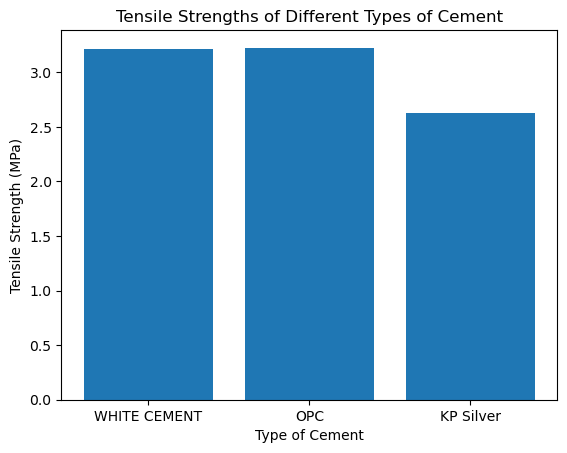

In [5]:
plt.bar(data["Type of cement"], data['Tensile Strength (MPa)'])
plt.title('Tensile Strengths of Different Types of Cement')
plt.xlabel('Type of Cement')
plt.ylabel('Tensile Strength (MPa)')
plt.show()

### Converting the Null values in Admixtures.
If no admixture was used WRITE IT to No Admixture

In [6]:
data['Admixtures'] = data['Admixtures'].fillna('No Admixture')
data.isnull().sum()

Samples                        0
Cement amount (g)              0
Water (g)                      0
Type of cement                 0
Average Aggregate size (mm)    0
Aggregate(Coarse)(g)           0
Aggregate(SAND)(g)             0
Curing Duration (days)         0
Admixtures                     0
Load at Fracture (N)           0
Tensile Strength (MPa)         0
dtype: int64

### FEATURE SELECTION
I will do this by removing the columns that I do not need for my model

Like the Samples, Load at Fracture (N)

In [7]:

data = data.drop(["Samples", "Load at Fracture (N)"], axis=1)
data.head()

,Cement amount (g),Water (g),Type of cement,Average Aggregate size (mm),Aggregate(Coarse)(g),Aggregate(SAND)(g),Curing Duration (days),Admixtures,Tensile Strength (MPa)
0,701,190,WHITE CEMENT,20,2828,1414,7,Air-Entraining,2.953152
1,701,100,WHITE CEMENT,10,2828,1414,7,Air-Entraining,2.587828
2,701,284,OPC,5,2828,1414,7,No Admixture,3.221041
3,701,246,KP Silver,5,2828,1414,7,Air-Entraining,1.753442
4,701,277,WHITE CEMENT,20,2828,1414,7,No Admixture,2.346771


### ENCODING MY COLUMNS

In [8]:
data.dtypes

Cement amount (g)                int64
Water (g)                        int64
Type of cement                  object
Average Aggregate size (mm)      int64
Aggregate(Coarse)(g)             int64
Aggregate(SAND)(g)               int64
Curing Duration (days)           int64
Admixtures                      object
Tensile Strength (MPa)         float64
dtype: object

## Encoding

In [9]:

data['Type of cement'] = data['Type of cement'].replace({"OPC": 0, "KP Silver": 1, "WHITE CEMENT": 2})
data['Admixtures'] = data['Admixtures'].replace({"Air-Entraining": 0, "No Admixture": 1})
data.head(3)

,Cement amount (g),Water (g),Type of cement,Average Aggregate size (mm),Aggregate(Coarse)(g),Aggregate(SAND)(g),Curing Duration (days),Admixtures,Tensile Strength (MPa)
0,701,190,2,20,2828,1414,7,0,2.953152
1,701,100,2,10,2828,1414,7,0,2.587828
2,701,284,0,5,2828,1414,7,1,3.221041


In [10]:
#data = data.drop(["Cement amount (g)", "Aggregate(Coarse)(g)","Aggregate(SAND)(g)","Curing Duration (days)"], axis=1)
data.head(3)

,Cement amount (g),Water (g),Type of cement,Average Aggregate size (mm),Aggregate(Coarse)(g),Aggregate(SAND)(g),Curing Duration (days),Admixtures,Tensile Strength (MPa)
0,701,190,2,20,2828,1414,7,0,2.953152
1,701,100,2,10,2828,1414,7,0,2.587828
2,701,284,0,5,2828,1414,7,1,3.221041


In [11]:
data.shape

(81, 9)

The data is NOW PERFECT FOR Training my model

# THE PYTORCH MODEL

In [12]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torch import nn, optim
import pandas as pd

In [13]:
from sklearn.preprocessing import StandardScaler
# Assuming df is your DataFrame and that it's already been preprocessed
X = data.drop('Tensile Strength (MPa)', axis=1).values
y = data['Tensile Strength (MPa)'].values

# Initialize a scaler
scaler = StandardScaler()

# Fit on the features and transform
normalized_features = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_features, y, test_size=0.2, random_state=42)

# Convert the data to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)



## The Model

In [14]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim

class TensileStrength(nn.Module):
    def __init__(self,input_size,output_size):
        super(TensileStrength, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 64)
        self.fc5 = nn.Linear(64, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x



In [15]:
# INITIALIZING THE MODEL
model = TensileStrength(X_train.shape[1], 1)

### Model Achitecture

In [16]:
from torchsummary import summary
input_size = (X_train.shape[1],) 
summary(model, input_size)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]             576
            Linear-2                   [-1, 64]           4,160
            Linear-3                   [-1, 64]           4,160
            Linear-4                   [-1, 64]           4,160
            Linear-5                    [-1, 1]              65
Total params: 13,121
Trainable params: 13,121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.05
Estimated Total Size (MB): 0.05
----------------------------------------------------------------


### LOSS FUNCTION AND MODEL OPTIMIZATION

In [17]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)



## Training

In [18]:
num_epochs = 80
losses = []  # to store the loss values
val_losses = []  # to store the validation loss values
streak = 0  # to count the streak of constant loss

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Validate the model
    val_outputs = model(X_test)
    val_loss = criterion(val_outputs, y_test)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Save the losses
    losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    # Check if the loss is constant
    if len(losses) > 1 and losses[-1] == losses[-2]:
        streak += 1
    else:
        streak = 0
    
    # Stop training if the loss is constant for 10 epochs
    if streak >= 20:
        print('Loss is constant for 10 epochs, stopping training')
        break
    
    if (epoch+1) % 100 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}, Val Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item(), val_loss.item()))


c:\Users\Administrator\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\Administrator\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([17])) that is different to the input size (torch.Size([17, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


### Loss Vs Epochs

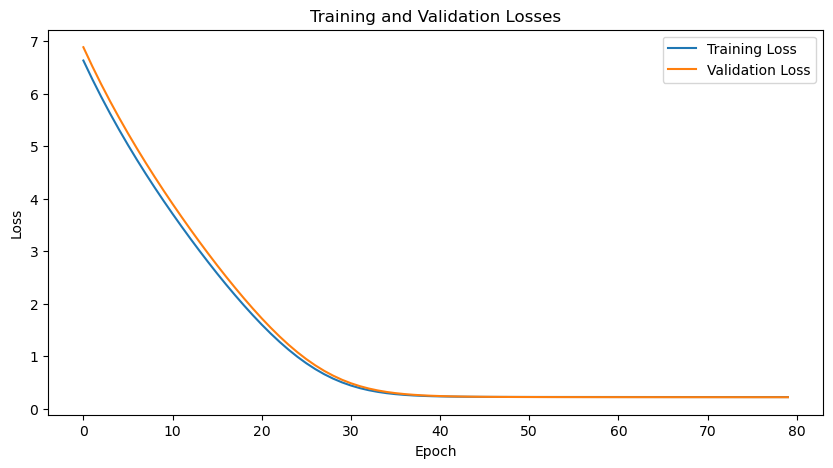

In [19]:
# Plotting the training and validation loss
plt.figure(figsize=(10,5))
plt.plot(losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Model evaluation

In [20]:
# Forward pass on validation data and calculate loss
val_outputs = model(X_test)

# Convert tensors to numpy arrays for plotting
actual_values = y_test.detach().numpy()
predicted_values = val_outputs.detach().numpy()

# Calculate the absolute error
errors = np.abs(actual_values - predicted_values)

print("Shape of actual_values:", actual_values.shape)
print("Shape of predicted_values:", predicted_values.shape)
print("Shape of errors:", errors.shape)


Shape of actual_values: (17,)
Shape of predicted_values: (17, 1)
Shape of errors: (17, 17)


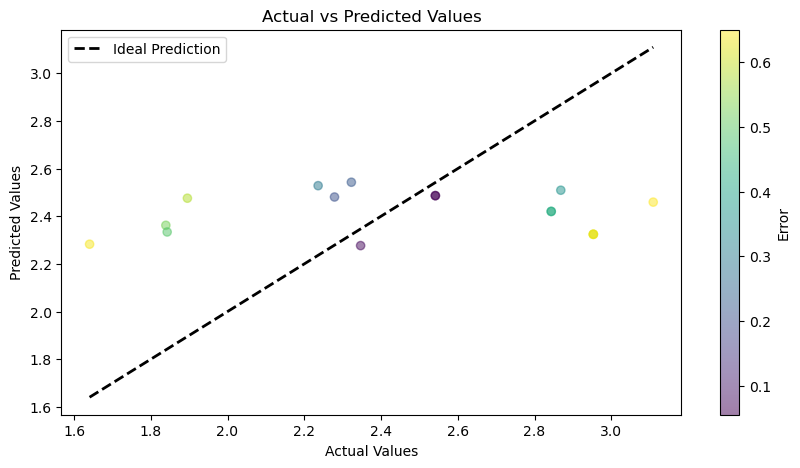

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Forward pass on validation data and calculate loss
val_outputs = model(X_test)

# Convert tensors to numpy arrays for plotting
actual_values = y_test.detach().numpy()
predicted_values = np.squeeze(val_outputs.detach().numpy())

# Calculate the absolute error
errors = np.abs(actual_values - predicted_values)

# Create a scatter plot with colors representing the error
plt.figure(figsize=(10,5))
plt.scatter(actual_values, predicted_values, c=errors, cmap='viridis', alpha=0.5)
plt.colorbar(label='Error')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Plot a diagonal line for reference
plt.plot([actual_values.min(), actual_values.max()], [actual_values.min(), actual_values.max()], 'k--', lw=2, label='Ideal Prediction')
plt.legend()

plt.show()


 This scatter plot will help you visualize the correlation between the actual and predicted values. Points that lie on the diagonal line represent perfect predictions, while points that deviate from the line represent errors in prediction.

In [22]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

model.eval()
with torch.no_grad():
    y_pred = model(X_test)

# Convert tensors to numpy arrays for sklearn metrics
y_test_np = y_test.detach().numpy()
y_pred_np = y_pred.detach().numpy()

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test_np, y_pred_np)
print(f"Mean Absolute Error: {round(mae , 2) } ")

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_np, y_pred_np)
print(f"Mean Squared Error: {round(mse, 2)} ")

#calculate r2_score error
r2score = r2_score(y_test_np, y_pred_np)
print(f"R-Squared error: {round(r2score*100 , 2)} %")


#R-Squared error: 78.3467 %


Mean Absolute Error: 0.4000000059604645 
Mean Squared Error: 0.20999999344348907 
R-Squared error: -1.46 %


### Save the model

In [23]:
# Save the model
torch.save(model, 'Model\copytensile_strength_model.pth')

prediction

In [28]:
data = {
    "Cement amount (g)": 701,
    "Water (g)": 500,
    "Type of cement": 2,
    "Aggregate(Coarse)(g)":2828,
    "Aggregate(SAND)(g)": 1414,
    "Average Aggregate size (mm)": 20,
    "Curing Duration (days)": 7,
    "Admixtures":1
}

In [29]:
# Initialize a scaler
scaler = StandardScaler()

# Fit on the features and transform
normalized_features = scaler.fit_transform([list(data.values())])

    # model path
modell = torch.load("Model\copytensile_strength_model.pth")
# Load the state dictionary

# Make a prediction
with torch.no_grad():
    inputs = torch.tensor(normalized_features, dtype=torch.float)
    outputs = modell.forward(inputs)
    
# Print the data and prediction to the console (optional)
print("Data:", data)
print("Predicted Tensile Strength:", round(outputs.item(), 5), "MPa")


Data: {'Cement amount (g)': 701, 'Water (g)': 500, 'Type of cement': 2, 'Aggregate(Coarse)(g)': 2828, 'Aggregate(SAND)(g)': 1414, 'Average Aggregate size (mm)': 20, 'Curing Duration (days)': 7, 'Admixtures': 1}
Predicted Tensile Strength: 2.24014 MPa
